# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: January 22nd (Monday) 11:00 pm </b> </font>


# <font color="blue"> KIRAN KOREY </font>

# Overview


In this assignment I have learned to use many tools like Python, numpy, matplotlib, pandas and Jupyter notebook.

I have used two data sets, Poker Hand Data for classification and Toyota Corolla Cars Data for Regression analysis.

In Regression I have compared the price of a car with respect to other attributes to show how one attribute is dependednt on other attribute. 

In Classification I have classified the data and have plotted a Pie Chart to show which classification has the highest percentage of occurances.

# Data


## 1.Regression

### Introduction of the Data
For the purpose of regression analysis I have used Toyota Corolla Cars Data Set, some of the attributes that exists in the data are as follows :

1. Price -Price of the Car
2. Age - Age of the Car.
3. KM - Number Kilometers the car has been used.
4. FuelType - Type of the Fuel used ('Petrol','Diesel','CNG')

HP, MetColor, Automatic, CC, Doors and Weight are some of the other attributes.

### Source of the Data

This is data was taken from https://github.com/datailluminations/PredictingToyotaPricesBlog.git .


### Reading the Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data 
df = pd.read_csv("ToyotaCorolla_regression.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


### Preprocessing of the Data

In [2]:
# Check for any cell with null values
np.any(df.isnull())

False

In [3]:
# Replace String values of 'Petrol','Diesel', and 'CNG' with  1, 2 and 3 respectively using lambda functions
fuleTypeDic = {'Petrol': 1, 'Diesel':2,'CNG':3}


df['FuelType'] = df['FuelType'].apply(lambda x: fuleTypeDic[x])
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,2,90,1,0,2000,3,1165
1,13750,23,72937,2,90,1,0,2000,3,1165
2,13950,24,41711,2,90,1,0,2000,3,1165
3,14950,26,48000,2,90,0,0,2000,3,1165
4,13750,30,38500,2,90,0,0,2000,3,1170


In [4]:
#To read Price column into "prices" array
prices = np.array(df.loc[:, 'Price'])
prices

array([13500, 13750, 13950, ...,  8500,  7250,  6950], dtype=int64)

### Visualization of the data

In [5]:
# To check the average of the prices
np.average(prices)

10730.824512534818

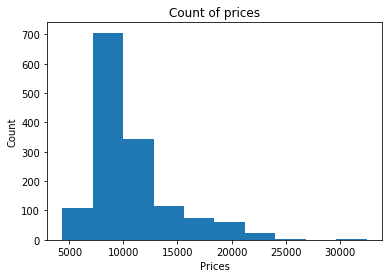

In [6]:
# TO plot histogram of count of prices to see the range of most used cars.

#?plt.hist()
plt.hist(prices)
plt.title("Count of prices")
plt.ylabel('Count');
plt.xlabel('Prices');

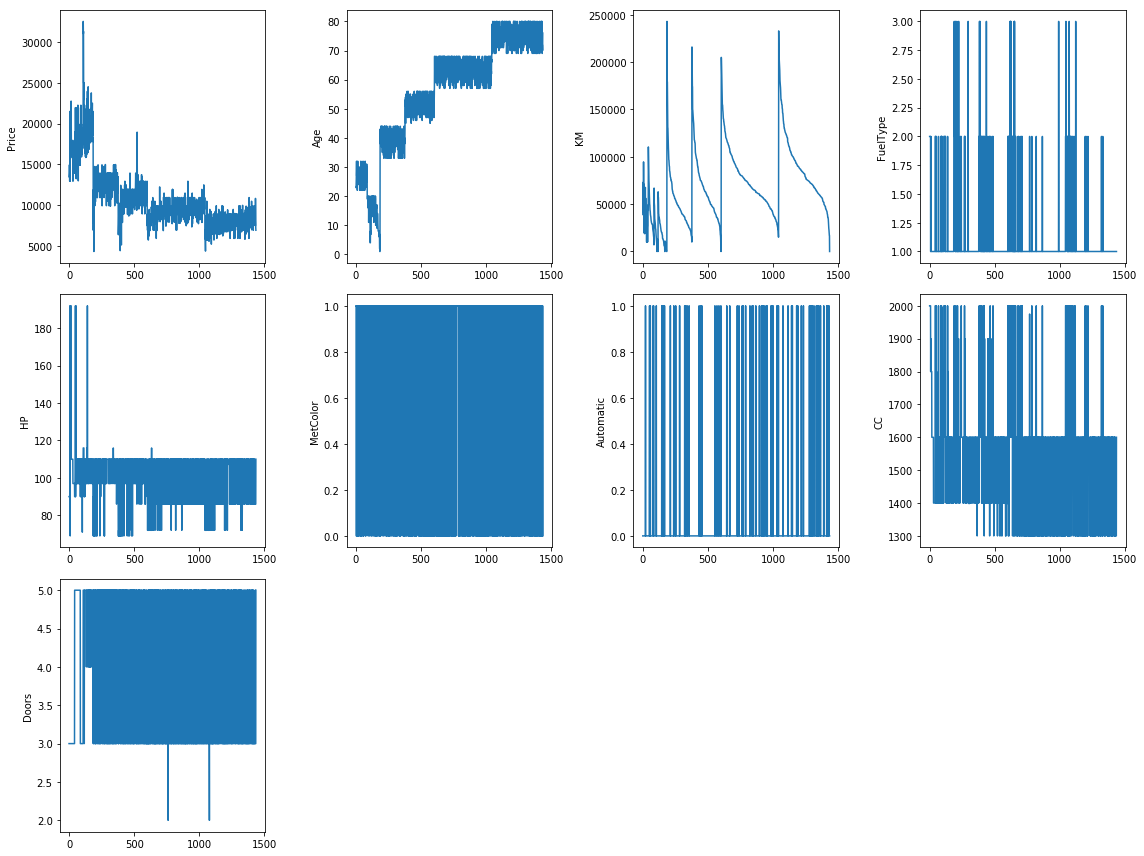

In [7]:
# To plot a graph of all the attributes to find out the trend of each attribute
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()

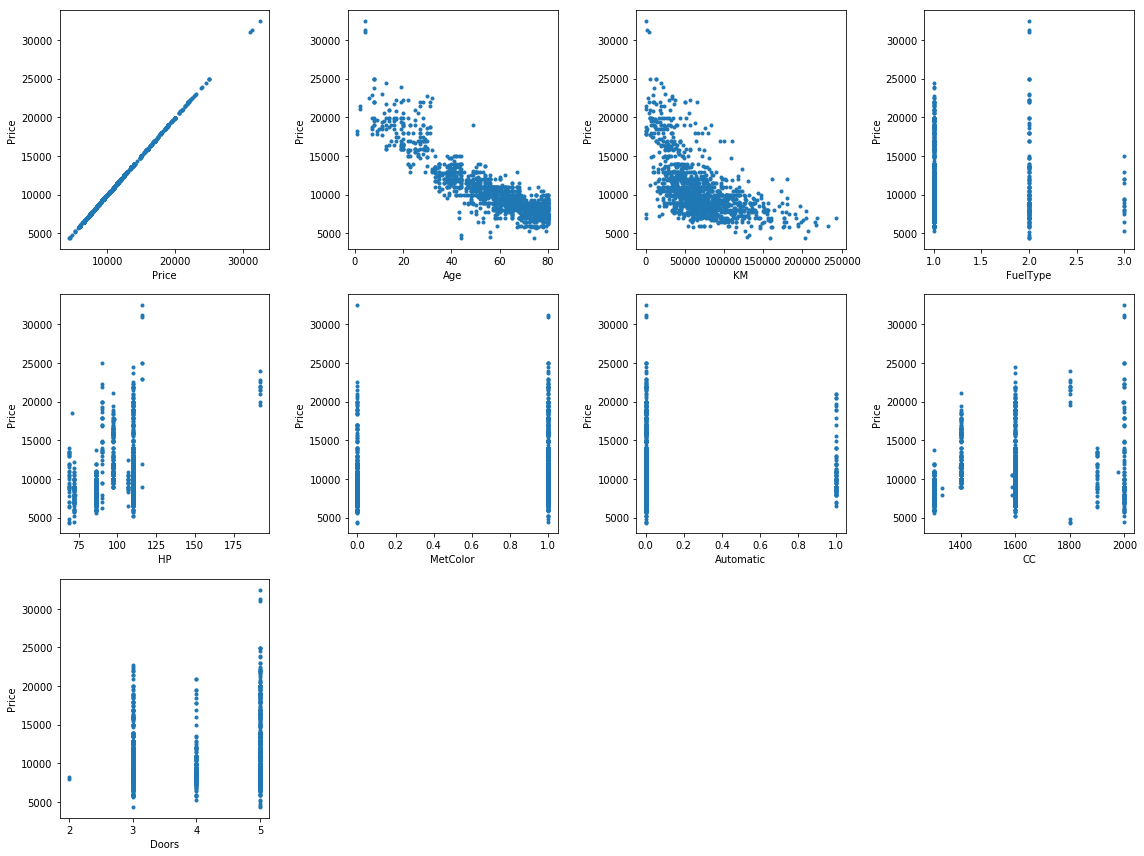

In [8]:
# To plot a grap of all the attributes with rrespect to Price attribute

fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i],prices, '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel('Price')
fig.tight_layout()

### Preliminary observation

From the above Data Visualization we can find the following observations :
1. Cars in the Range of 10000 are more frequent.
2. The price of the car is indirectly proportional to Age of the car and to the Number of Kilometers the car is used.


## 2.Classification

### Introduction of the Data
For the purpose of Classification analysis I have used Poker Hand Data Set.Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. 
Some of the attributes that exists in the data are as follows :

1) S1 "Suit of card #1" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

2) C1 "Rank of card #1" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

3) S2 "Suit of card #2" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

4) C2 "Rank of card #2" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

5) S3 "Suit of card #3" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

6) C3 "Rank of card #3" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

7) S4 "Suit of card #4" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

8) C4 "Rank of card #4" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

9) S5 "Suit of card #5" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

10) C5 "Rank of card 5" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

11) CLASS "Poker Hand" 
Ordinal (0-9) 

    0: Nothing in hand; not a recognized poker hand 
    1: One pair; one pair of equal ranks within five cards 
    2: Two pairs; two pairs of equal ranks within five cards 
    3: Three of a kind; three equal ranks within five cards 
    4: Straight; five cards, sequentially ranked with no gaps 
    5: Flush; five cards with the same suit 
    6: Full house; pair + different rank three of a kind 
    7: Four of a kind; four equal ranks within five cards 
    8: Straight flush; straight + flush 
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush 



### Source of the Data
This is data was taken from https://archive.ics.uci.edu/ml/datasets/Poker+Hand

### Reading the Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data 
df = pd.read_csv("poker-hand-training-true.data",header=None,names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5', 'Class'])
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


### Preprocessing of the data

In [10]:
# Check for any cell with null values
np.any(df.isnull())

False

In [11]:
# Check column values
df.columns.values

array(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class'], dtype=object)

In [12]:
# Summary of the Data Set
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [13]:
# Copy Class Column into "class" variable
classValues = df.loc[:, 'Class']

### Visualization of the data

In [14]:
# To plot a graph of all the attributes to find out the trend of each attribute
# fig = plt.figure(figsize=(16,12))
# plt.clf()
# for i in range(10):
#     plt.subplot(3, 4, i+1)
#     plt.hist(df.iloc[:, i])
#     plt.ylabel(df.columns.values[i])
# fig.tight_layout()

#Commented as graph does not show any trend, because it is just a set of some random values

([<matplotlib.patches.Wedge at 0x27084b16898>,
 [Text(0.00331626,2.2,'Nothing in hand'),
  Text(-0.528146,-2.13566,'One pair'),
  Text(2.08103,-0.713651,'Two pairs'),
  Text(2.18561,-0.251206,'Three of a kind'),
  Text(2.19839,-0.0842661,'Straight'),
  Text(2.19957,-0.0436605,'Flush'),
  Text(2.19992,-0.0187917,'Full house'),
  Text(2.19999,-0.00718519,'Four of a kind'),
  Text(2.2,-0.00414535,'Straight flush'),
  Text(2.2,-0.00138186,'Royal flush')],
 [Text(0.00180887,1.2,'49.95'),
  Text(-0.288079,-1.16491,'42.38'),
  Text(1.13511,-0.389264,'4.82'),
  Text(1.19215,-0.137021,'2.05'),
  Text(1.19912,-0.0459633,'0.37'),
  Text(1.19976,-0.0238148,'0.22'),
  Text(1.19996,-0.01025,'0.14'),
  Text(1.19999,-0.00391919,'0.02'),
  Text(1.2,-0.0022611,'0.02'),
  Text(1.2,-0.00075374,'0.02')])

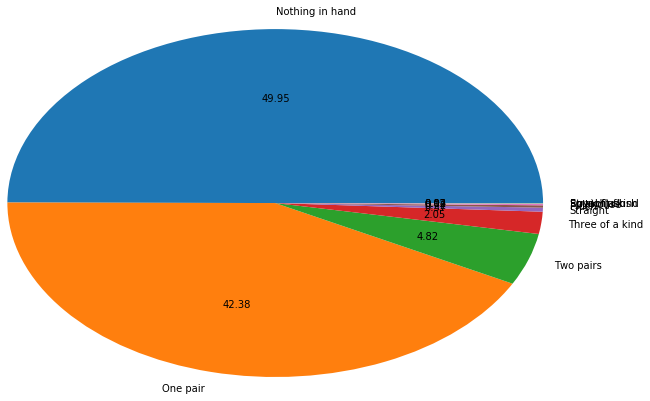

In [15]:
# To plot a graph to show the percentage of each class.
classArray = np.array(classValues)
lablesV, counts = np.unique(classArray, return_counts=True)

plt.pie(counts,labels=["Nothing in hand","One pair","Two pairs","Three of a kind","Straight","Flush","Full house","Four of a kind","Straight flush","Royal flush"],radius =2., autopct='%.2f')


### Preliminary observation

From the graphs we saw that 
1. Class "Nothing in hand" has occured in 12493 instances which constitutes to 49.95202%.
2. Class "One pair" has occured in 10599 instances which constitutes to 42.37905%.
3. Class "Two pairs" has occured in 1206 instances which constitutes to 4.82207%.
    
                     . . . .  So on and . . . .
   
9. Class "Royal flush" has occured in 5 instances which constitutes to 0.01999%.

# Conclusions

As I am new to using most of the tools used here, i did face a lot of chanlenges to get everything going.
I am also new to Python, so I had to learn python (I referred Scipy notes) first and then all the other tools.
Finding data for regression was another area where I had to spend a little extra time.
Over all it was a great 0th Assignment to understand various tools used for the class and I'm sure will get to learn a lot more in further assignments.

# References

1. For Classification data : https://archive.ics.uci.edu/ml/datasets/Poker+Hand 
2. For Regression data : https://github.com/datailluminations/PredictingToyotaPricesBlog.git
3. For Regression example http://dataillumination.blogspot.com/2015/03/predictive-analytics-predicting-toyota.html
4. For Syntax Errors : https://stackoverflow.com
5. For Python and Library related : http://www.scipy-lectures.org/index.html


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data | 
 | 5| Introduction of data for regression
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 5| Introduction of data for Classification 
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 

